In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Numpy version :',np.__version__)
print('Pandas Version :',pd.__version__)

Numpy version : 1.16.4
Pandas Version : 0.23.4


In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Datasets/amazon.csv", 
                 encoding='UTF-8', sep=',', skiprows=0, index_col=False)
data = pd.DataFrame(df)
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
#Creating New Column called Month Number 
df['month_number']=df['month']

In [5]:
#Changing Month Into Number and making new column

month={'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March', 'Abril': 'April', 'Maio': 'May',
          'Junho': 'June', 'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September', 'Outubro': 'October',
          'Novembro': 'November', 'Dezembro': 'December'}
df['month']=df['month'].map(month)
df.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [6]:
##Changing Month Number into number

monthno={'Janeiro': '1', 'Fevereiro': '2', 'Março': '3', 'Abril': '4', 'Maio': '5',
          'Junho': '6', 'Julho': '7', 'Agosto': '8', 'Setembro': '9', 'Outubro': '10',
          'Novembro': '11', 'Dezembro': '12'}
df['month_number']=df['month_number'].map(monthno)
df['month_number'] = df['month_number'].astype(float)

In [7]:
#Changin state into numeric value
from sklearn import preprocessing
df['state_code']=df['state']

state_code = preprocessing.LabelEncoder()
state_code.fit(df['state_code'])
df['state_code'] = state_code.transform(df['state_code'])




In [8]:
#Changing Date type from object into datatime
df.loc[:,'date'] = df['date'].astype('datetime64')

df.head(5)

,year,state,month,number,date,month_number,state_code
0,1998,Acre,January,0.0,1998-01-01,1.0,0
1,1999,Acre,January,0.0,1999-01-01,1.0,0
2,2000,Acre,January,0.0,2000-01-01,1.0,0
3,2001,Acre,January,0.0,2001-01-01,1.0,0
4,2002,Acre,January,0.0,2002-01-01,1.0,0


In [9]:
df.dtypes

year                     int64
state                   object
month                   object
number                 float64
date            datetime64[ns]
month_number           float64
state_code               int32
dtype: object

In [18]:
#Show the data 
df.head(10)

,year,state,month,number,date,month_number,state_code
0,1998,Acre,January,0.0,1998-01-01,1.0,0
1,1999,Acre,January,0.0,1999-01-01,1.0,0
2,2000,Acre,January,0.0,2000-01-01,1.0,0
3,2001,Acre,January,0.0,2001-01-01,1.0,0
4,2002,Acre,January,0.0,2002-01-01,1.0,0
5,2003,Acre,January,10.0,2003-01-01,1.0,0
6,2004,Acre,January,0.0,2004-01-01,1.0,0
7,2005,Acre,January,12.0,2005-01-01,1.0,0
8,2006,Acre,January,4.0,2006-01-01,1.0,0
9,2007,Acre,January,0.0,2007-01-01,1.0,0


In [14]:
#See the correlation Between The column using Kendall Method
df.corr(method='kendall')

,year,number,month_number,state_code
year,1.000000,0.108525,-0.008130,-0.000277
number,0.108525,1.000000,0.077727,0.061363
month_number,-0.008130,0.077727,1.000000,0.000271
state_code,-0.000277,0.061363,0.000271,1.000000


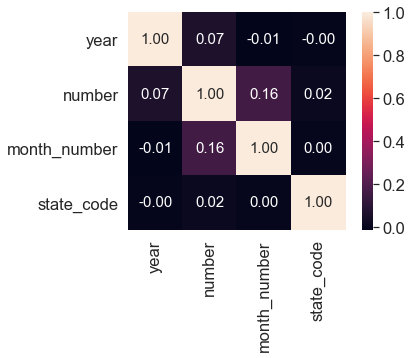

In [15]:
#See the correlation with Heat Map
import seaborn as sns
import matplotlib.pyplot as plt
cor=['year','number','month_number','state_code']
cm= np.corrcoef(df[cor].values,rowvar=0)
sns.set(font_scale=1.5)
hm1 = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cor,
    xticklabels=cor)
plt.show()

In [17]:
#Export the cleaning into new datasets
df.columns = map(str.lower, df.columns)
df.to_csv(r"C:\Users\HP\Desktop\Datasets/amazon_cleaned.csv")